In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D,Flatten,Dense

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Set the path to your dataset folder
dataset_path = '/kaggle/input/dangerous-insects-dataset/farm_insects'

# Use Keras image_dataset_from_directory to create a dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=dataset_path,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.2,
    subset='training',
    seed=42
)

# Create a validation dataset
validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory=dataset_path,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.3,
    subset='validation',
    seed=42
)




Found 1591 files belonging to 15 classes.
Using 1273 files for training.
Found 1591 files belonging to 15 classes.
Using 477 files for validation.


In [3]:
train_ds.class_names

['Africanized Honey Bees (Killer Bees)',
 'Aphids',
 'Armyworms',
 'Brown Marmorated Stink Bugs',
 'Cabbage Loopers',
 'Citrus Canker',
 'Colorado Potato Beetles',
 'Corn Borers',
 'Corn Earworms',
 'Fall Armyworms',
 'Fruit Flies',
 'Spider Mites',
 'Thrips',
 'Tomato Hornworms',
 'Western Corn Rootworms']

In [4]:
# X_val = []
# y_val = []

# # Iterate over the validation_ds dataset to extract images and labels
# for images, labels in validation_ds:
#     X_val.extend(images.numpy())
#     y_val.extend(labels.numpy())

# # Convert the lists to NumPy arrays
# X_val = np.array(X_val)
# y_val = np.array(y_val)

# # Print the shapes of X_val and y_val
# print("Shape of X_val:", X_val.shape)
# print("Shape of y_val:", y_val.shape)

In [5]:
import tensorflow as tf
import numpy as np

def load_and_normalize_data(dataset, batch_size=32, image_size=(256, 256)):
    # Initialize empty lists to store images and labels
    X = []
    y = []

    # Iterate over the dataset to extract images and labels
    for images, labels in dataset:
        # Normalize the images
        normalized_images = images / 255.0
        X.extend(normalized_images.numpy())
        y.extend(labels.numpy())

    # Convert the lists to NumPy arrays
    X = np.array(X)
    y = np.array(y)

    return X, y

# Assuming you already have the train_ds and validation_ds datasets
# train_ds = tf.keras.utils.image_dataset_from_directory(...)
# validation_ds = tf.keras.utils.image_dataset_from_directory(...)

# Load and normalize training data
X_train, y_train = load_and_normalize_data(train_ds)

# Load and normalize validation data
X_val, y_val = load_and_normalize_data(validation_ds)

# Print the shapes of X_train, y_train, X_val, and y_val
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)


Shape of X_train: (1273, 256, 256, 3)
Shape of y_train: (1273,)
Shape of X_val: (477, 256, 256, 3)
Shape of y_val: (477,)


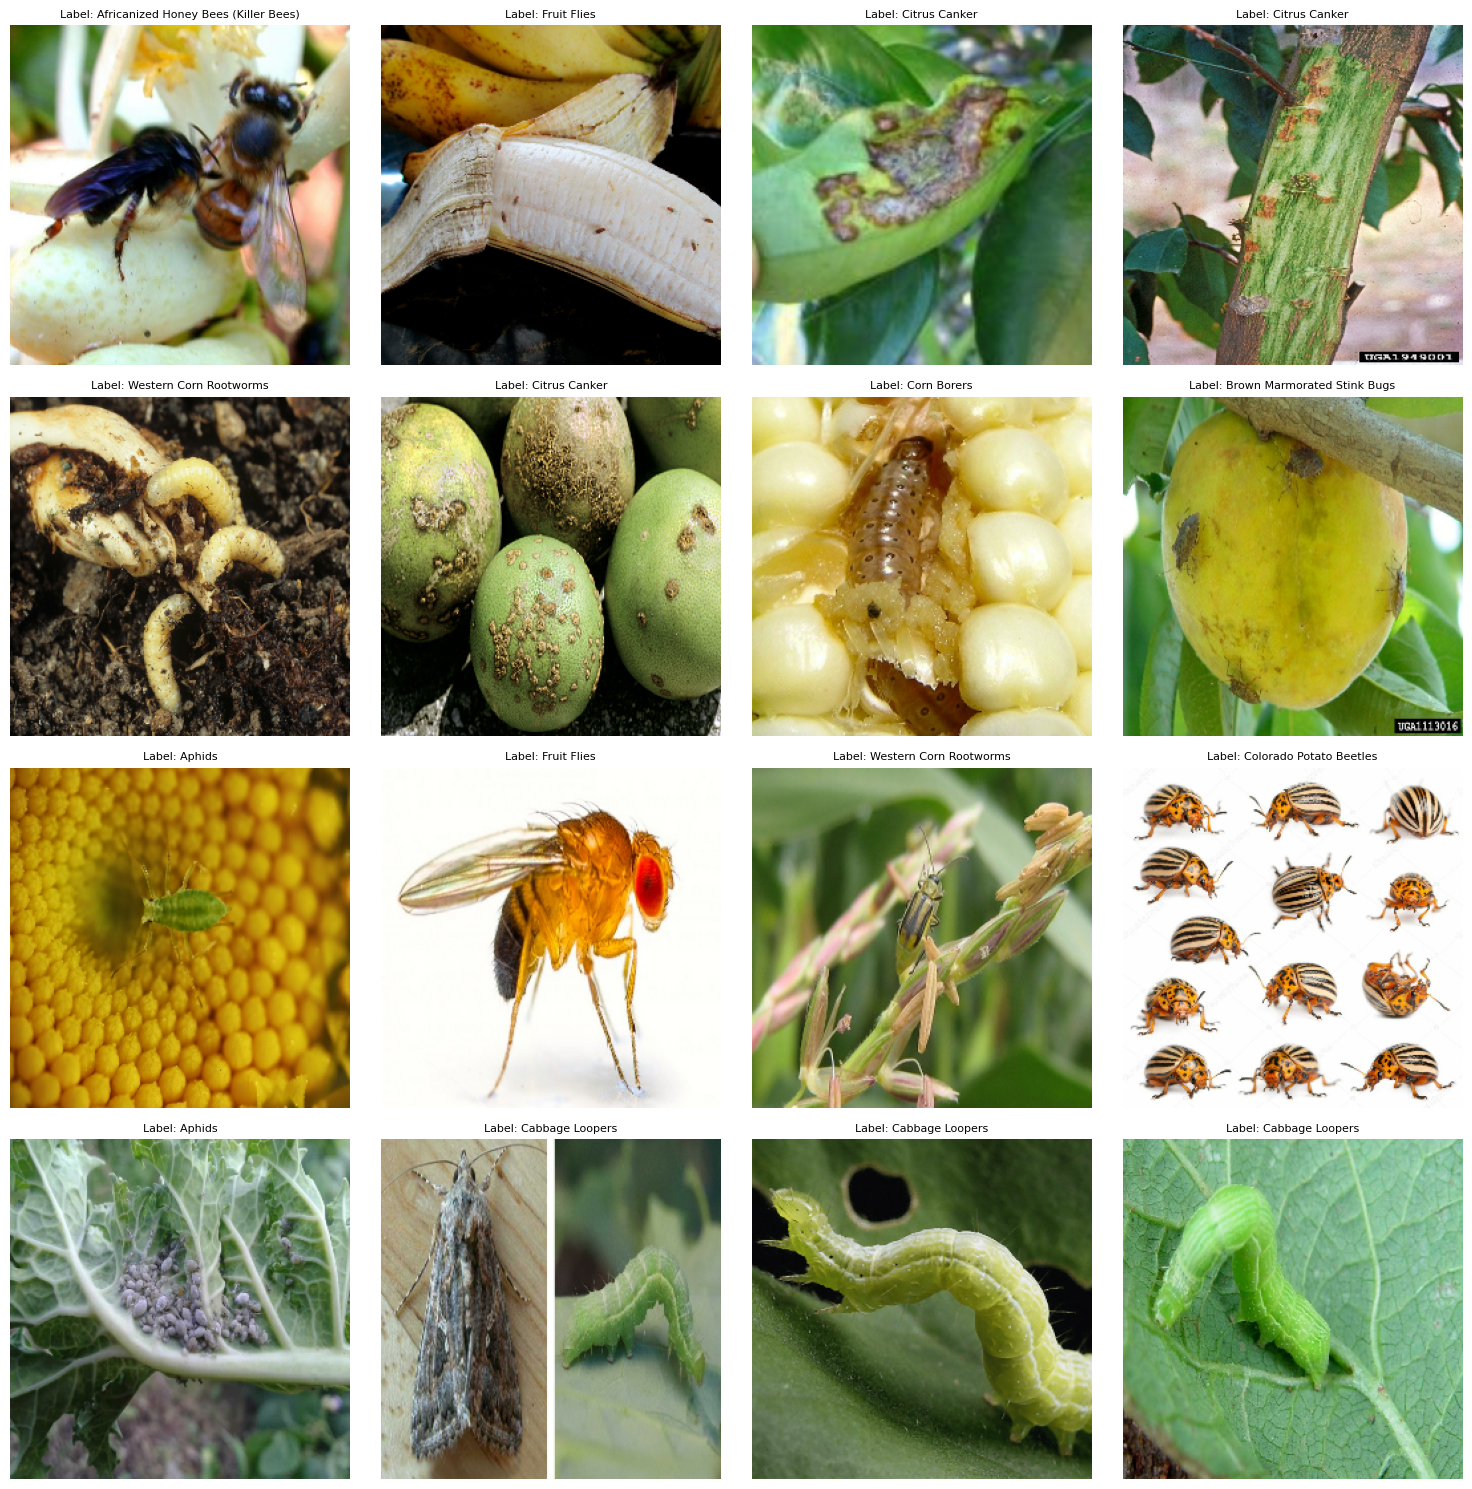

In [6]:
import matplotlib.pyplot as plt
import math

# Assuming X_train contains your training images
# Select 16 images to display
sample_images = X_train[:16]
sample_labels = y_train[:16]

# Define class labels
class_labels = [
    'Africanized Honey Bees (Killer Bees)',
    'Aphids',
    'Armyworms',
    'Brown Marmorated Stink Bugs',
    'Cabbage Loopers',
    'Citrus Canker',
    'Colorado Potato Beetles',
    'Corn Borers',
    'Corn Earworms',
    'Fall Armyworms',
    'Fruit Flies',
    'Spider Mites',
    'Thrips',
    'Tomato Hornworms',
    'Western Corn Rootworms'
]

# Create a 4x4 grid for images
fig, axes = plt.subplots(4, 4, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Display each image with its corresponding label
for i, (image, label) in enumerate(zip(sample_images, sample_labels)):
    axes[i].imshow(image)
    axes[i].set_title(f"Label: {class_labels[label]}", fontsize=8)
    axes[i].axis("off")
plt.savefig('image_grid.png')


# Adjust layout to prevent clipping of titles
plt.tight_layout()

plt.show()


In [7]:
# !pip install scikeras

In [8]:
X_train_r = X_train.reshape(-1, 256, 256, 3)
X_val_r = X_val.reshape(-1, 256, 256, 3)

In [9]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=15)
y_val = to_categorical(y_val, num_classes=15)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2

# Placeholder for loading or defining your datasets
# Replace these with your actual datasets


# Load the InceptionResNetV2 model
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Add custom layers for your specific task with L2 regularization, dropout, and batch normalization
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(0.0001), kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu', kernel_regularizer=l2(0.0001), kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
predictions = Dense(15, activation='softmax', kernel_regularizer=l2(0.0001))(x)

# Create the final model
inceptionresnetv2_model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with a lower initial learning rate
inceptionresnetv2_model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Define a ModelCheckpoint callback to save the model with the highest validation accuracy
checkpoint = ModelCheckpoint("best_model_inceptionresnetv2.h5", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Add learning rate reduction callback
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, min_lr=1e-7, verbose=1)

# Create an ImageDataGenerator with data augmentation configurations for training data
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Apply data augmentation to the training dataset
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)

# Create a separate ImageDataGenerator for validation data without augmentation
val_datagen = ImageDataGenerator()

# Apply no data augmentation to the validation dataset
val_generator = val_datagen.flow(X_val, y_val, batch_size=32)

# Train the model with augmented data and validate with original validation data
history = inceptionresnetv2_model.fit(train_generator, validation_data=val_generator, epochs=100,batch_size = 32, callbacks=[checkpoint, reduce_lr])

# Save the model in TensorFlow SavedModel format
inceptionresnetv2_model.save("inceptionresnetv2_model.h5")
# Load the best model
best_model_inceptionresnetv2 = load_model("inceptionresnetv2_model.h5")

# Evaluate model performance on testing data
evaluation_result = best_model_inceptionresnetv2.evaluate(X_val, y_val)
print("Test Loss:", evaluation_result[0])
print("Test Accuracy:", evaluation_result[1])


219055592/219055592 [==============================] - 1s 0us/step
Epoch 1/100
40/40 [==============================] - ETA: 0s - loss: 2.7673 - accuracy: 0.2474
Epoch 1: val_accuracy improved from -inf to 0.43816, saving model to best_model_inceptionresnetv2.h5
40/40 [==============================] - 140s 751ms/step - loss: 2.7673 - accuracy: 0.2474 - val_loss: 2.1501 - val_accuracy: 0.4382 - lr: 1.0000e-04
Epoch 2/100
40/40 [==============================] - ETA: 0s - loss: 1.7490 - accuracy: 0.5232
Epoch 2: val_accuracy improved from 0.43816 to 0.55556, saving model to best_model_inceptionresnetv2.h5
40/40 [==============================] - 23s 570ms/step - loss: 1.7490 - accuracy: 0.5232 - val_loss: 1.6295 - val_accuracy: 0.5556 - lr: 1.0000e-04
Epoch 3/100
40/40 [==============================] - ETA: 0s - loss: 1.3527 - accuracy: 0.6371
Epoch 3: val_accuracy improved from 0.55556 to 0.67715, saving model to best_model_inceptionresnetv2.h5
40/40 [==============================] -

In [11]:
# import matplotlib.pyplot as plt

# # Plot training history
# plt.figure(figsize=(16, 6))

# # Plot training & validation accuracy values
# plt.subplot(1, 2, 1)
# plt.plot(history.history['accuracy'], color='blue', marker='o', label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], color='orange', marker='o', linestyle='dashed', label='Validation Accuracy')
# plt.title('Model Accuracy', fontsize=16)
# plt.xlabel('Epoch', fontsize=12)
# plt.ylabel('Accuracy', fontsize=12)
# plt.legend(loc='lower right')
# plt.grid(True, linestyle='--', alpha=0.7)

# # Add some spacing between subplots
# plt.subplots_adjust(wspace=0.4)

# # Plot training & validation loss values
# plt.subplot(1, 2, 2)
# plt.plot(history.history['loss'], color='blue', marker='o', label='Training Loss')
# plt.plot(history.history['val_loss'], color='orange', marker='o', linestyle='dashed', label='Validation Loss')
# plt.title('Model Loss', fontsize=16)
# plt.xlabel('Epoch', fontsize=12)
# plt.ylabel('Loss', fontsize=12)
# plt.legend(loc='upper right')
# plt.grid(True, linestyle='--', alpha=0.7)

# # Adjust layout to prevent overlapping
# plt.tight_layout()

# # Add overall title
# plt.suptitle('InceptionResNetV2 Model', fontsize=18,color='red')

# # Save the figure
# plt.savefig('training_history_inceptionresnetv2.png')

# # Show the figure
# plt.show()


In [12]:
model.save('inceptionresnetv2_model.h5')

NameError: name 'model' is not defined

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.preprocessing import image
# import numpy as np
# import matplotlib.pyplot as plt

# # Class labels
# class_labels = [
#     'Africanized Honey Bees (Killer Bees)',
#     'Aphids',
#     'Armyworms',
#     'Brown Marmorated Stink Bugs',
#     'Cabbage Loopers',
#     'Citrus Canker',
#     'Colorado Potato Beetles',
#     'Corn Borers',
#     'Corn Earworms',
#     'Fall Armyworms',
#     'Fruit Flies',
#     'Spider Mites',
#     'Thrips',
#     'Tomato Hornworms',
#     'Western Corn Rootworms'
# ]

# def preprocess_image(img_path, target_size=(256, 256)):
#     img = image.load_img(img_path, target_size=target_size)
#     img_array = image.img_to_array(img)
#     img_array = np.expand_dims(img_array, axis=0)
#     img_array /= 255.0  # Normalize pixel values
#     return img_array

# def load_and_predict(model_path, img_path):
#     # Load the trained model
#     model = tf.keras.models.load_model(model_path)

#     # Preprocess the image
#     img_array = preprocess_image(img_path)

#     # Make predictions
#     predictions = model.predict(img_array)

#     # Get the predicted class label
#     predicted_class_index = np.argmax(predictions)
#     predicted_class_label = class_labels[predicted_class_index]

#     return predicted_class_label, predictions

# def show_image_with_label(img_path, label):
#     # Display the image
#     img = image.load_img(img_path)
#     plt.imshow(img)
#     plt.title(f'Predicted Class: {label}')
#     plt.axis('off')
#     plt.show()

# if __name__ == "__main__":
#     # Replace with the path to your trained model
#     model_path = '/kaggle/input/mymodel/83_xception_model.h5'

#     # Replace with the path to the image you want to predict
#     img_path = '/kaggle/input/dangerous-insects-dataset/farm_insects/Aphids/Image_10.jpg'

#     predicted_class, predictions = load_and_predict(model_path, img_path)

#     print(f"The predicted class is: {predicted_class}")
#     print("Predictions for each class:")
# #     for label, prob in zip(class_labels, predictions.flatten()):
# #         print(f"{label}: {prob * 100:.2f}%")

#     # Show the image with the predicted label
#     show_image_with_label(img_path, predicted_class)


In [ ]:
import sys
print("Python version")
print(sys.version)
print("Version info.")
print(sys.version_info)


In [ ]:
import tensorflow as tf
print("TensorFlow version: ", tf.__version__)


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

class_labels = [
    'Africanized Honey Bees (Killer Bees)', 'Aphids', 'Armyworms', 'Brown Marmorated Stink Bugs',
    'Cabbage Loopers', 'Citrus Canker', 'Colorado Potato Beetles', 'Corn Borers', 'Corn Earworms',
    'Fall Armyworms', 'Fruit Flies', 'Spider Mites', 'Thrips', 'Tomato Hornworms', 'Western Corn Rootworms'
]

def preprocess_image(img_path, target_size=(256, 256)):
    img = image.img_to_array(image.load_img(img_path, target_size=target_size))[None] / 255.0
    return img

def load_and_predict(model_path, img_path):
    model = tf.keras.models.load_model(model_path)
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)
    return class_labels[np.argmax(predictions)], predictions

def show_image_with_label(img_path, label):
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.title(f'Predicted Class: {label}')
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    model_path = '/kaggle/input/mymodel/83_xception_model.h5'
    img_path = '/kaggle/input/aaaaaaa/mousqito.JPG'

    predicted_class, predictions = load_and_predict(model_path, img_path)

    print(f"The predicted class is: {predicted_class}")
    print("Predictions for each class:")
    # for label, prob in zip(class_labels, predictions.flatten()):
    #     print(f"{label}: {prob * 100:.2f}%")

    show_image_with_label(img_path, predicted_class)
